In [1]:
##importing the libraries

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imread
%matplotlib inline

import string
import spacy

from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install wordcloud

In [3]:
from wordcloud import WordCloud

In [4]:
#importing the dataset

elon = pd.read_csv(r"C:\Users\91739\Downloads\Elon_musk.csv", encoding='ISO-8859-1')
elon

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
elon.drop(columns='Unnamed: 0' , inplace=True)
elon

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
#No. of words in each tweet

elon['word_count'] = elon['Text'].apply(lambda x: len(str(x).split(' ')))
elon.head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [7]:
elon['digits'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
elon.head()

,Text,word_count,digits
0,@kunalb11 Im an alien,4,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0
2,@joerogan @Spotify Great interview!,4,0
3,@gtera27 Doge is underestimated,4,0
4,@teslacn Congratulations Tesla China for amazi...,17,0


In [8]:
elon.digits.value_counts()

0     1854
1      117
2       23
3        3
4        1
10       1
Name: digits, dtype: int64

In [9]:
elon['web_links'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
elon.head()

,Text,word_count,digits,web_links
0,@kunalb11 Im an alien,4,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0,0
2,@joerogan @Spotify Great interview!,4,0,0
3,@gtera27 Doge is underestimated,4,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,0,0


In [10]:
elon.web_links.value_counts()

0    1356
1     632
2      11
Name: web_links, dtype: int64

In [11]:
elon['hashtag'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
elon.head()

,Text,word_count,digits,web_links,hashtag
0,@kunalb11 Im an alien,4,0,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0,0,0
2,@joerogan @Spotify Great interview!,4,0,0,0
3,@gtera27 Doge is underestimated,4,0,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,0,0,0


In [12]:
elon.hashtag.value_counts()

0    1990
1       5
2       3
4       1
Name: hashtag, dtype: int64

In [13]:
elon = [Text.strip() for Text in elon.Text] # remove both the leading and the trailing characters 
elon = [Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False
elon[0:5]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [14]:
# Joining the list into one string/text
elon_text = ' '.join(elon)
elon_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

Extract reviews of any product from ecommerce website like amazon & Perform emotion mining

In [36]:
#importing necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt #graphical representation
import seaborn as sns

import string # special operations on strings
import spacy # language models

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline 

import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup as bs

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests

In [37]:
iphone_reviews=[]

for i in range (1,31):
    iphn=[]
    url ="https://www.amazon.in/Apple-iPhone-13-Mini-512/product-reviews/B09V44HD84/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        iphn.append(reviews[i].text)
    iphone_reviews = iphone_reviews+iphn

In [28]:
from selenium import webdriver

In [38]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91739\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91739\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91739\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
iphone_reviews = list(set(iphone_reviews))
iphone_reviews

["\nLet me sum up my mind here. I hate Iphones. I used to have an work phone (Iphone SE).Being a Sony Xperia user since Sony Arc times, I didn't have a choice to move away form the Sony portfolio as they don't sell in India anymore. My XZ1 is still working after 5.5 years, but she is getting old. And I repeat I hate IPhones.After much deliberation between 12, 13 and 13 Mini, I went with 13 Mini.1. I really wanted a phone I could use in a single hand, it fits perfect.2. I got a great deal on the purchase, as the net amt I paid was Rs. 58,900 after card discounts. So it is cheaper than a lot of Android phones with high end configuration.3. Performance. It is smooth and fast.4. Face Id works. I don't like it, but it works, I miss the Touch Id, but i knew what I was getting. So no complains.5. The Starlight colour is beautiful. I love whites.6. Camera is brilliant. I am a point shoot, not a camera buff. My Sony XZ1 Camera is 5 years outdates, so this is refreshing.7. The only pain point is

In [40]:
#cleaning the text 

txt_upd = ' '.join(iphone_reviews)
txt_upd

'\nLet me sum up my mind here. I hate Iphones. I used to have an work phone (Iphone SE).Being a Sony Xperia user since Sony Arc times, I didn\'t have a choice to move away form the Sony portfolio as they don\'t sell in India anymore. My XZ1 is still working after 5.5 years, but she is getting old. And I repeat I hate IPhones.After much deliberation between 12, 13 and 13 Mini, I went with 13 Mini.1. I really wanted a phone I could use in a single hand, it fits perfect.2. I got a great deal on the purchase, as the net amt I paid was Rs. 58,900 after card discounts. So it is cheaper than a lot of Android phones with high end configuration.3. Performance. It is smooth and fast.4. Face Id works. I don\'t like it, but it works, I miss the Touch Id, but i knew what I was getting. So no complains.5. The Starlight colour is beautiful. I love whites.6. Camera is brilliant. I am a point shoot, not a camera buff. My Sony XZ1 Camera is 5 years outdates, so this is refreshing.7. The only pain point 

In [42]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

txt_upd

' let me sum up my mind here i hate iphones i used to have an work phone iphone se being a sony xperia user since sony arc times i didn t have a choice to move away form the sony portfolio as they don t sell in india anymore my xz is still working after years but she is getting old and i repeat i hate iphones after much deliberation between and mini i went with mini i really wanted a phone i could use in a single hand it fits perfect i got a great deal on the purchase as the net amt i paid was rs after card discounts so it is cheaper than a lot of android phones with high end configuration performance it is smooth and fast face id works i don t like it but it works i miss the touch id but i knew what i was getting so no complains the starlight colour is beautiful i love whites camera is brilliant i am a point shoot not a camera buff my sony xz camera is years outdates so this is refreshing the only pain point is inability to transfer whatsapp from android to iphone i knew this so not a

In [43]:
text_tokens = word_tokenize(txt_upd)

In [46]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [47]:
#create the df

tf = TfidfVectorizer()

In [48]:
text_tf = tf.fit_transform(tokens_without_sw)

In [49]:
feature_names = tf.get_feature_names_out()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [50]:
df

,absolutely,accessories,accustomed,adapt,adapting,adequate,agree,amazing,amt,android,...,whites,whos,work,working,works,world,wrt,xperia,xz,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
word_list = ' '.join(df)

In [60]:
wordcloud = WordCloud(background_color='black',
                      width=4500,
                      height=2600).generate(word_list)

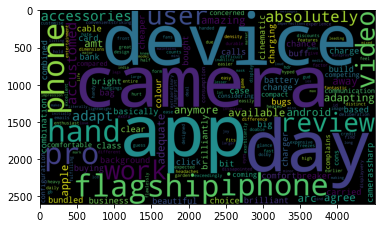

In [61]:
plt.imshow(wordcloud)